# Imports

In [44]:
import pandas as pd
import numpy as np

## 1. Load

Read the CSV from a provided GitHub raw URL.

In [45]:
url = "https://raw.githubusercontent.com/turcotte/csi4106-f25/main/assignments-data/a1/alien_pet_health.csv"

df = pd.read_csv(url)

Show shape, dtypes, memory, a few rows.

In [46]:
df.shape

(5000, 14)

In [47]:
df.dtypes

record_id                        object
thermoreg_reading               float64
enzyme_activity_index           float64
dual_lobe_signal                float64
stress_variability              float64
habitat_zone                     object
activity_score                  float64
fasting_flag                    float64
health_outcome                    int64
station_code                     object
ingest_marker                   float64
calibration_tag                  object
diagnostic_noise                float64
thermoreg_reading_fahrenheit    float64
dtype: object

In [48]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     4817 non-null   object 
 1   thermoreg_reading             4701 non-null   float64
 2   enzyme_activity_index         4743 non-null   float64
 3   dual_lobe_signal              4756 non-null   float64
 4   stress_variability            4709 non-null   float64
 5   habitat_zone                  4845 non-null   object 
 6   activity_score                4771 non-null   float64
 7   fasting_flag                  4764 non-null   float64
 8   health_outcome                5000 non-null   int64  
 9   station_code                  4851 non-null   object 
 10  ingest_marker                 4748 non-null   float64
 11  calibration_tag               4833 non-null   object 
 12  diagnostic_noise              4738 non-null   float64
 13  the

In [49]:
df.head(5)

,record_id,thermoreg_reading,enzyme_activity_index,dual_lobe_signal,stress_variability,habitat_zone,activity_score,fasting_flag,health_outcome,station_code,ingest_marker,calibration_tag,diagnostic_noise,thermoreg_reading_fahrenheit
0,P22042111,52.6,97.0,3.6,-3.5,c2,2.0,0.0,1,Z-WHH,1.0,A,0.482088,34.742454
1,P21571318,41.8,105.0,3.4,10.5,c1,2.0,0.0,0,Z-EAT,1.0,A,NaN,NaN
2,P81737259,56.2,126.0,5.5,9.6,c2,5.0,0.0,0,Z-IPF,1.0,A,-0.747352,38.754061
3,P54935007,57.7,106.0,-4.1,-4.0,c1,4.0,0.0,1,Z-FKO,1.0,A,0.570478,40.465082
4,P63102956,34.5,73.0,2.3,0.3,c4,5.0,1.0,1,Z-SVY,1.0,A,-0.310844,NaN


## 2. Standardize missingness & dtypes

In [50]:
columns = df.columns

In [51]:
cat_columns = []

for column in columns:
    if df[column].dtypes == "object":
        cat_columns.append(column)
cat_columns

['record_id', 'habitat_zone', 'station_code', 'calibration_tag']

In [52]:
#check for empty strings or n/a or ?
for col in cat_columns:
    print(df[col].unique())

['P22042111' 'P21571318' 'P81737259' ... 'P35006706' 'P63948712'
 'P65521988']
['c2' 'c1' 'c4' 'c5' 'c3' nan '?']
['Z-WHH' 'Z-EAT' 'Z-IPF' ... 'Z-LAW' 'Z-UCX' 'Z-HFU']
['A' 'B' nan '?']


In [53]:
strings_to_replace = ["?",""]
for col in cat_columns:
    df[col] = df[col].replace(strings_to_replace, np.nan)

for col in cat_columns:
    print(df[col].unique())

Coerce numeric-like columns to numeric (errors→NaN).

In [54]:
for column in columns:
    if df[column].dtypes == "float64":
        df[column] = pd.to_numeric(df[column], errors = 'coerce')

## 3. Categoricals

Normalize obvious case/spacing variants in one categorical (e.g., habitat_zone).

### Didn't see any?

Report levels and their frequencies.

### What exactly is expected from levels?

In [55]:
for col in cat_columns:
    print(col)
    print(df[col].unique())        
    print(df[col].value_counts(dropna=False))
    #print(df[col].value_counts(dropna=False) = (lambda x:x/df[col].shape[0])

    total = sum(df[col].value_counts(dropna=False))
    freq = []
    for value in df[col].value_counts(dropna=False):
        freq.append(value/total)

    print(freq)

record_id
['P22042111' 'P21571318' 'P81737259' ... 'P35006706' 'P63948712'
 'P65521988']
record_id
NaN          286
P13511446      1
P35697133      1
p81597528      1
P22104681      1
            ... 
P49369349      1
P46632025      1
P66119210      1
P36791525      1
P49522586      1
Name: count, Length: 4715, dtype: int64
[0.0572, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0

## 4. Remove non-informative / leakage features

Drop unique IDs, constants/quasi-constants, high-cardinality quasi-IDs, and any _scaled linear duplicates.

In [56]:
new_columns = []
for col in df.columns:
    new_columns.append(col)

new_columns.remove("record_id")
new_columns.remove("ingest_marker")

df = df[new_columns]
df.head(10)

,thermoreg_reading,enzyme_activity_index,dual_lobe_signal,stress_variability,habitat_zone,activity_score,fasting_flag,health_outcome,station_code,calibration_tag,diagnostic_noise,thermoreg_reading_fahrenheit
0,52.6,97.0,3.6,-3.5,c2,2.0,0.0,1,Z-WHH,A,0.482088,34.742454
1,41.8,105.0,3.4,10.5,c1,2.0,0.0,0,Z-EAT,A,NaN,NaN
2,56.2,126.0,5.5,9.6,c2,5.0,0.0,0,Z-IPF,A,-0.747352,38.754061
3,57.7,106.0,-4.1,-4.0,c1,4.0,0.0,1,Z-FKO,A,0.570478,40.465082
4,34.5,73.0,2.3,0.3,c4,5.0,1.0,1,Z-SVY,A,-0.310844,NaN
5,39.7,69.0,-1.2,5.1,c4,2.0,1.0,0,Z-WAH,A,1.416906,20.280384
6,51.2,94.0,-1.7,3.8,c2,3.0,1.0,1,Z-YDK,A,-1.347186,33.150564
7,47.6,113.0,0.4,-4.4,c5,3.0,1.0,1,Z-SFR,A,-0.554478,NaN
8,50.0,80.0,-2.6,NaN,c3,NaN,1.0,0,Z-DCX,A,-0.820194,31.848790
9,43.3,71.0,0.4,-2.0,c4,3.0,1.0,0,Z-DJJ,A,0.280675,24.322605


Briefly justify in a sentence or two.

Removed the ID column which is certainly wrong to keep as each row have an ID that has no relation with the prediction. Removed ingest marker because they are all 1.0 or nan.

## 5. Unit consistency

If a numeric column shows a mixed-unit cluster (a subset ￿10× larger), correct it; verify with before/after plots.

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
num_columns = []
for col in df.columns:
    if df[col].dtypes == "float64":
        num_columns.append(col)

In [59]:
def create_KDE(col, data):
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=data, fill=True)
    plt.yscale('log')
    plt.title("Overall Distribution of "+ col)
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.tight_layout()
    plt.show()

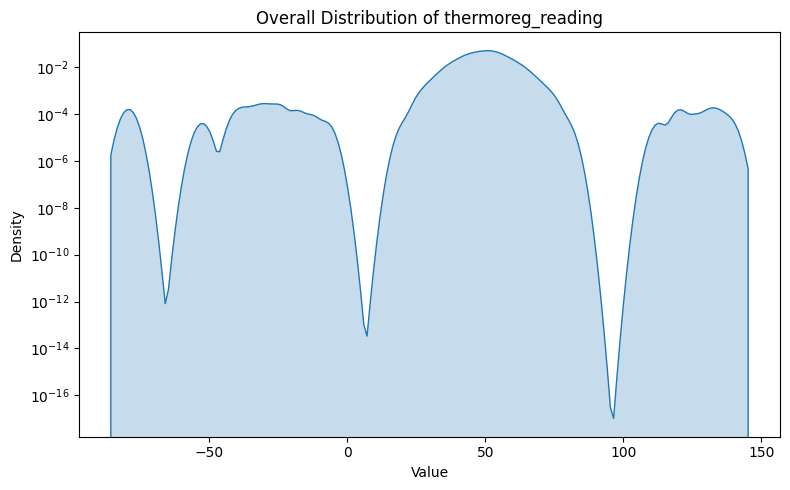

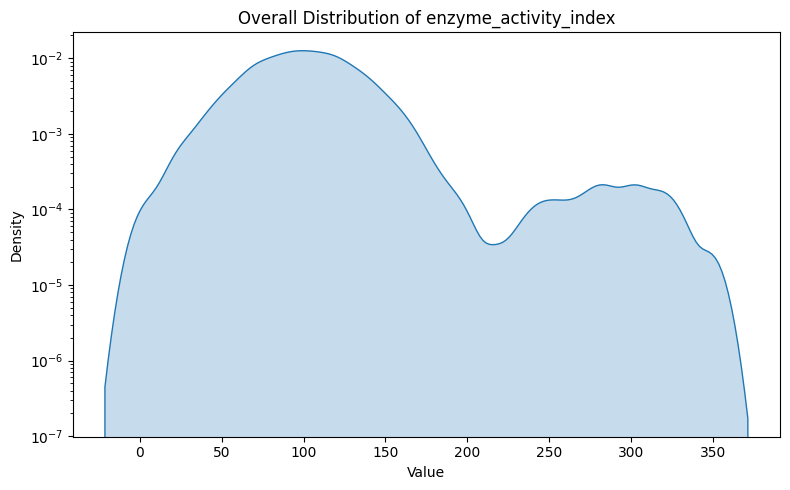

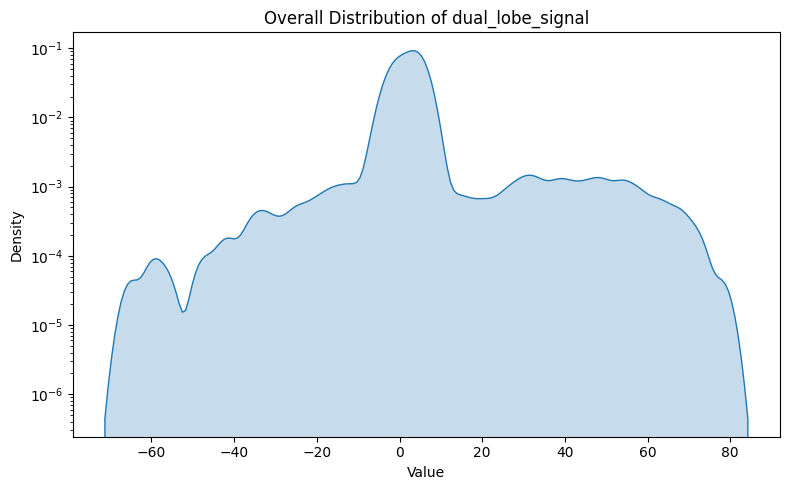

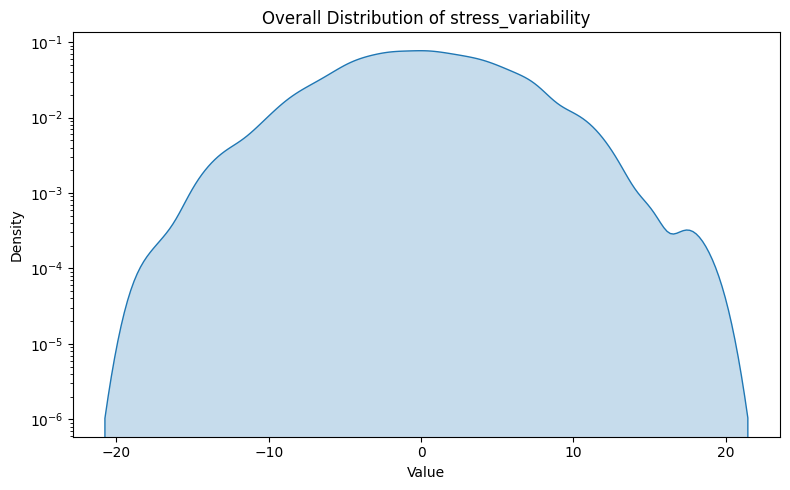

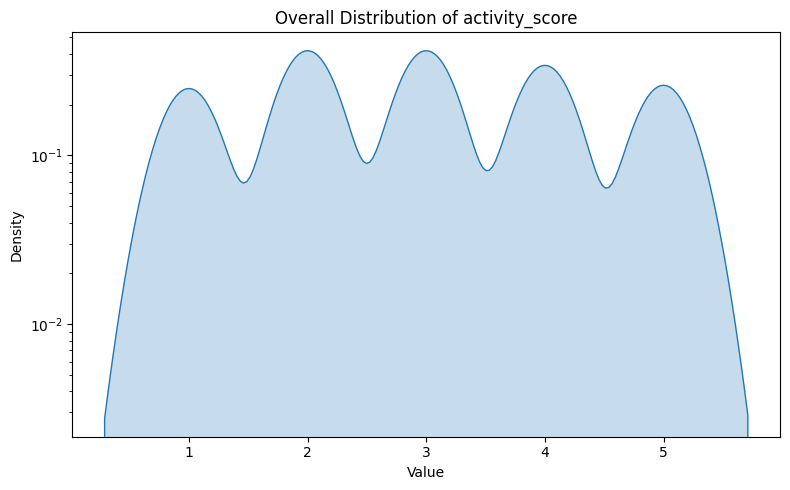

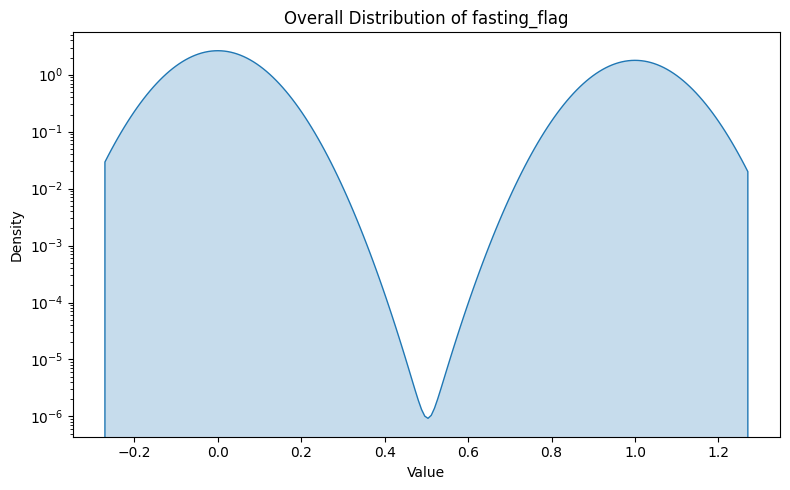

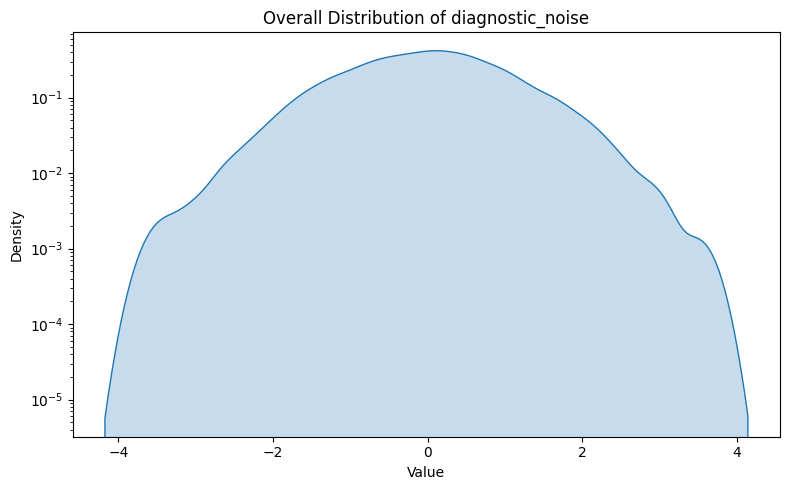

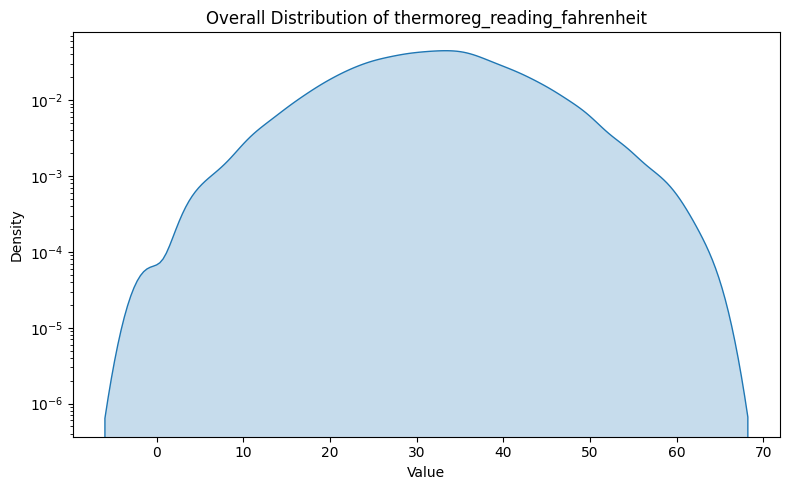

In [60]:
for col in num_columns:
    create_KDE(col, df[col])

I did not notice any weird extra clusters that could not be explained by another cluster (a weird cluster being defined by being a 10x of another cluster).

## 6. Outliers

Flag with a robust rule (e.g., IQR). Choose a treatment (cap/winsorize or leave) and state why.

In [61]:
outlier_counts = {}

for col in num_columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Count outliers
    num_outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    outlier_counts[col] = num_outliers

    # Winsorize (cap values)
    df[col] = np.where(df[col] < lower_bound, lower_bound,
                       np.where(df[col] > upper_bound, upper_bound, df[col]))

In [62]:
outlier_counts

{'thermoreg_reading': np.int64(96),
 'enzyme_activity_index': np.int64(119),
 'dual_lobe_signal': np.int64(386),
 'stress_variability': np.int64(25),
 'activity_score': np.int64(0),
 'fasting_flag': np.int64(0),
 'diagnostic_noise': np.int64(50),
 'thermoreg_reading_fahrenheit': np.int64(40)}

## 7. Impute

Find the numeric median of each numeric column

In [74]:
# Copy before imputation (for reporting)
_before_impute = df.copy()

# Identify dtypes
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category', 'string', 'bool']).columns.tolist()

# Strategy records
impute_strategies = {}

# Numeric: median imputation
med = []
for col in num_cols:
    med += [(col,df[col].median(skipna=True))]

med


[('thermoreg_reading', np.float64(49.900000000000006)),
 ('enzyme_activity_index', np.float64(101.0)),
 ('dual_lobe_signal', np.float64(2.7)),
 ('stress_variability', np.float64(0.0)),
 ('activity_score', np.float64(3.0)),
 ('fasting_flag', np.float64(0.0)),
 ('health_outcome', np.float64(0.0)),
 ('ingest_marker', np.float64(1.0)),
 ('diagnostic_noise', np.float64(0.009741261269987301)),
 ('thermoreg_reading_fahrenheit', np.float64(31.931894330319643))]

Ordinal/nominal: sensible defaults (most-frequent or explicit “unknown”).

In [75]:
# Categorical: mode (most frequent); if no mode (e.g., all NaN), use "Unknown"
for col in cat_cols:
    mode_vals = df[col].mode(dropna=True)
    if len(mode_vals) > 0:
        fill_val = mode_vals.iloc[0]
        strategy = 'most_frequent'
    else:
        fill_val = "Unknown"
        strategy = 'unknown_fallback'
    df[col] = df[col].fillna(fill_val)
    impute_strategies[col] = {'dtype':'categorical','strategy':strategy,'fill_value': fill_val}


Record imputation rates.

In [77]:
# Imputation report
imp_rows = []
n = len(df)
for col in df.columns:
    n_missing_before = _before_impute[col].isna().sum()
    n_missing_after  = df[col].isna().sum()
    n_imputed = int(n_missing_before - n_missing_after)
    rate = n_imputed / n if n else 0.0
    strat = impute_strategies.get(col, {'dtype': str(df[col].dtype), 'strategy':'none','fill_value':None})
    imp_rows.append({
        'column': col,
        'dtype_now': str(df[col].dtype),
        'dtype_assumed': strat.get('dtype'),
        'strategy': strat.get('strategy'),
        'fill_value_example': strat.get('fill_value'),
        'n_imputed': n_imputed,
        'imputation_rate': round(rate, 5),
    })
imputation_report = pd.DataFrame(imp_rows).sort_values(['n_imputed','column'], ascending=[False, True]).reset_index(drop=True)


imputation_report.head(20)

,column,dtype_now,dtype_assumed,strategy,fill_value_example,n_imputed,imputation_rate
0,record_id,object,categorical,most_frequent,?,183,0.0366
1,calibration_tag,object,categorical,most_frequent,A,167,0.0334
2,habitat_zone,object,categorical,most_frequent,c1,155,0.0310
3,station_code,object,categorical,most_frequent,?,149,0.0298
4,activity_score,float64,float64,none,None,0,0.0000
5,diagnostic_noise,float64,float64,none,None,0,0.0000
6,dual_lobe_signal,float64,float64,none,None,0,0.0000
7,enzyme_activity_index,float64,float64,none,None,0,0.0000
8,fasting_flag,float64,float64,none,None,0,0.0000
9,health_outcome,int64,int64,none,None,0,0.0000


## 8. Characterize distributions

Find the numeric median

In [78]:
def freedman_diaconis_bins(x: np.ndarray) -> int:
    x = x[~np.isnan(x)]
    if x.size < 2:
        return 1
    iqr = np.subtract(*np.percentile(x, [75, 25]))
    if iqr == 0:
        return min(10, max(1, int(np.sqrt(x.size))))
    h = 2 * iqr * (x.size ** (-1/3))
    bins = int(np.ceil((x.max() - x.min()) / h)) if h > 0 else 1
    return max(1, min(100, bins))

def histogram_mode_count(x: np.ndarray) -> int:
    x = x[~np.isnan(x)]
    if x.size < 3:
        return 1
    bins = freedman_diaconis_bins(x)
    counts, edges = np.histogram(x, bins=bins)
    # count local maxima (strict)
    peaks = 0
    for i in range(1, len(counts)-1):
        if counts[i] > counts[i-1] and counts[i] > counts[i+1]:
            peaks += 1
    return max(1, peaks)

Report skew/kurtosis and note uni- vs multi-modal

In [79]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

rows = []
for col in num_cols:
    x = df[col].astype(float).to_numpy()
    skew = pd.Series(x).skew()
    kurt = pd.Series(x).kurt()  # fisher=True by default in pandas
    modes = histogram_mode_count(x)
    modality = "multi-modal" if modes >= 2 else "uni-modal"
    rows.append({'column': col, 'skew': float(skew), 'kurtosis': float(kurt), 'mode_count': int(modes), 'modality': modality})
distribution_summary = pd.DataFrame(rows).sort_values('column').reset_index(drop=True)

distribution_summary


,column,skew,kurtosis,mode_count,modality
0,activity_score,0.077408,-1.073413,3,multi-modal
1,diagnostic_noise,-0.001550,0.138317,7,multi-modal
2,dual_lobe_signal,2.672164,13.696561,29,multi-modal
3,enzyme_activity_index,1.839920,8.169633,14,multi-modal
4,fasting_flag,0.391986,-1.847123,1,uni-modal
5,health_outcome,0.000800,-2.000800,1,uni-modal
6,ingest_marker,0.000000,0.000000,1,uni-modal
7,stress_variability,-0.006153,-0.025306,8,multi-modal
8,thermoreg_reading,-2.102431,31.206888,10,multi-modal
9,thermoreg_reading_fahrenheit,0.019115,0.059932,3,multi-modal


Include a compact set of histograms.

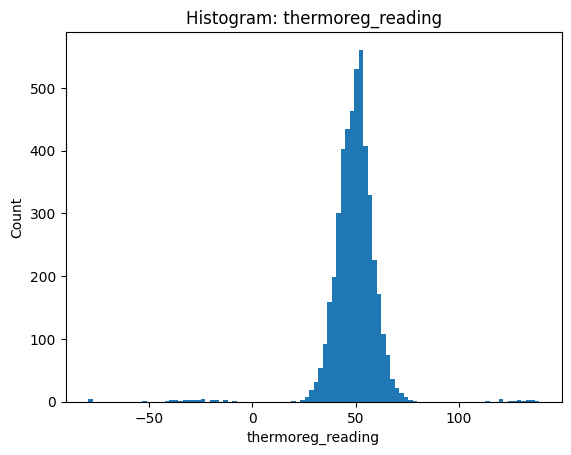

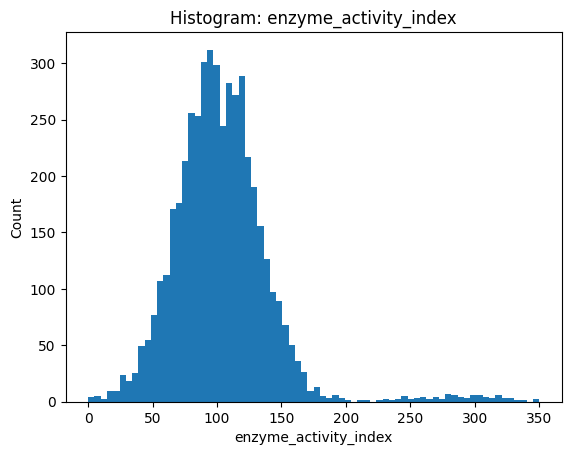

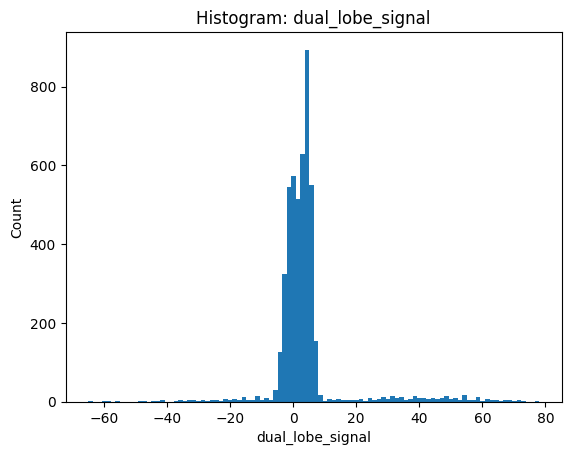

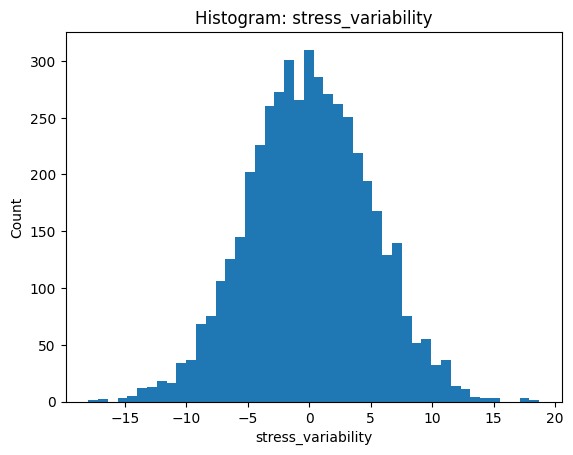

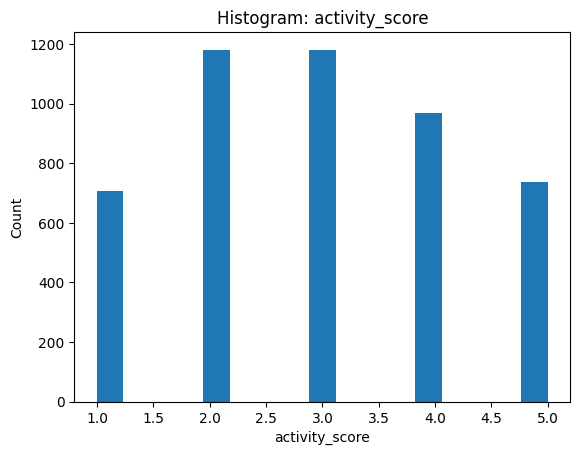

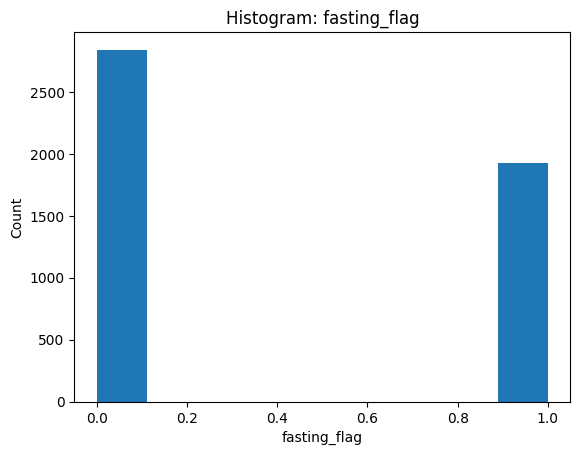

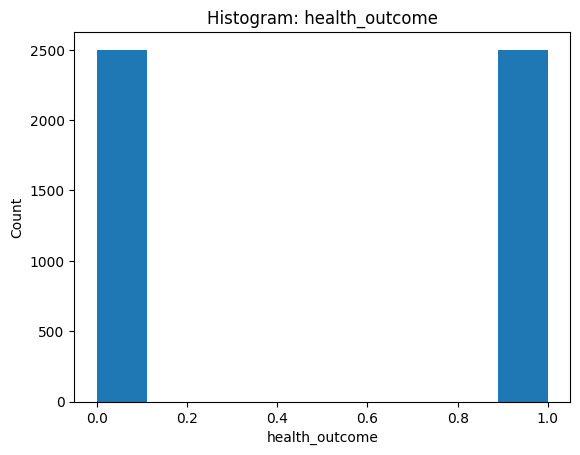

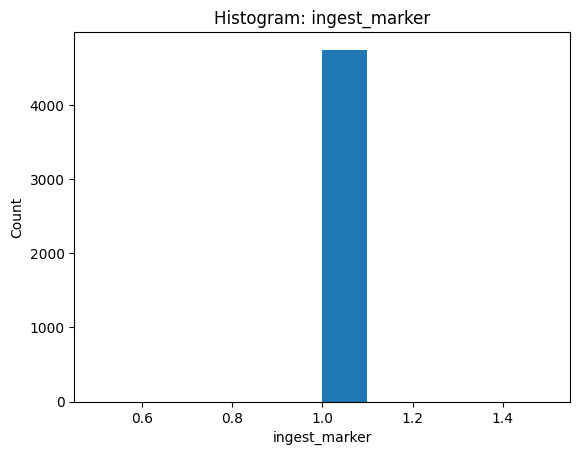

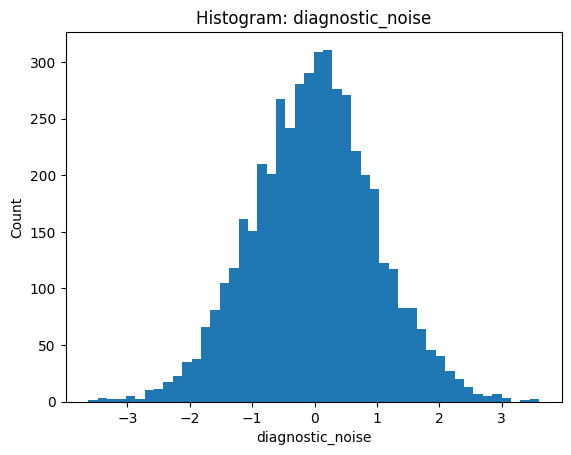

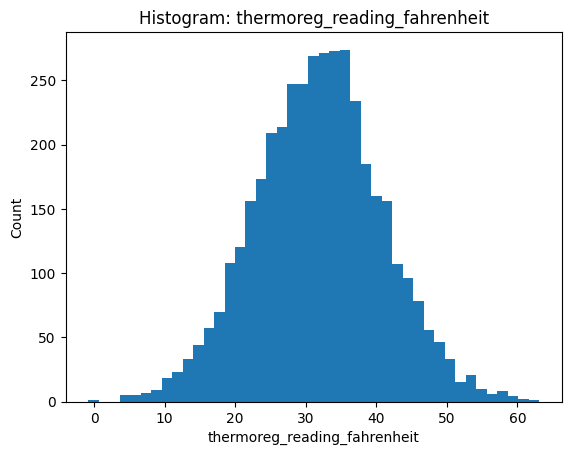

In [80]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Compact histograms (one per feature)
for col in num_cols:
    plt.figure()
    plt.hist(df[col].dropna().astype(float).to_numpy(), bins=freedman_diaconis_bins(df[col].to_numpy().astype(float)))
    plt.title(f"Histogram: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


## 9. Class balance

Report the target proportions and include a simple bar chart.


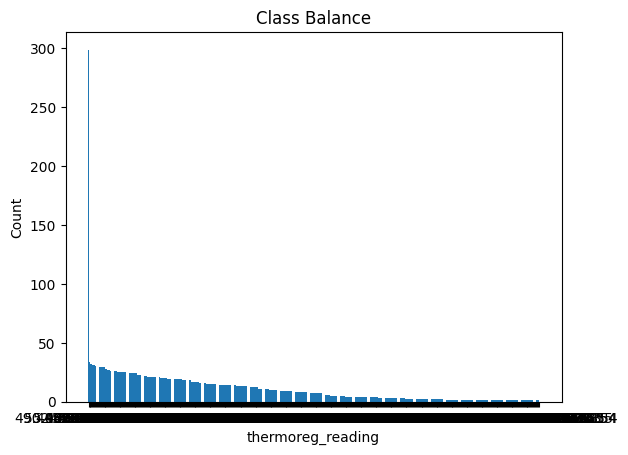

In [81]:
TARGET_COL= 'thermoreg_reading'


# Compact histograms (one per feature)
assert TARGET_COL in df.columns, f"Expected target column '{TARGET_COL}' in df.columns"

# Proportions
class_counts = df[TARGET_COL].value_counts(dropna=False)
class_props  = df[TARGET_COL].value_counts(normalize=True, dropna=False)

class_balance = pd.DataFrame({'count': class_counts, 'proportion': class_props}).reset_index().rename(columns={'index': TARGET_COL})

# Bar chart
plt.figure()
plt.bar(class_counts.index.astype(str), class_counts.values)
plt.title("Class Balance")
plt.xlabel(TARGET_COL)
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


In [82]:
class_balance

,thermoreg_reading,count,proportion
0,NaN,299,0.0598
1,49.700000,34,0.0068
2,50.700000,32,0.0064
3,49.400000,32,0.0064
4,49.800000,31,0.0062
...,...,...,...
476,76.300000,1,0.0002
477,29.800000,1,0.0002
478,132.118674,1,0.0002
479,-36.718674,1,0.0002



## 10. Assemble the modeling table

Keep **exactly** the core features (see palette) **plus** `health_outcome`.


In [83]:
url = "https://raw.githubusercontent.com/turcotte/csi4106-f25/main/assignments-data/a1/alien_pet_health.csv"

df = pd.read_csv(url)

new_columns = []
for col in df.columns:
    new_columns.append(col)

new_columns.remove("record_id")
new_columns.remove("ingest_marker")

model_df = df[new_columns].copy()

TARGET_COL = 'health_outcome'


Ensure correct dtypes (numeric / ordinal / binary).


In [84]:
# Ensure correct dtypes for model_df columns

# Numeric columns
numeric_cols = [
    'thermoreg_reading', 'enzyme_activity_index', 'dual_lobe_signal',
    'stress_variability', 'activity_score', 'diagnostic_noise', 'thermoreg_reading_fahrenheit'
]

# Binary columns (0/1)
binary_cols = ['fasting_flag', 'health_outcome']

# Categorical columns
categorical_cols = ['habitat_zone', 'station_code', 'calibration_tag']

model_df.loc[:, numeric_cols] = (
    model_df.loc[:, numeric_cols].apply(pd.to_numeric, errors='coerce')
)

tmp = model_df.loc[:, binary_cols].apply(pd.to_numeric, errors='coerce')
tmp = tmp.where(tmp.isin([0, 1]))
model_df.loc[:, binary_cols] = tmp.astype('Int64')

model_df.loc[:, categorical_cols] = (
    model_df.loc[:, categorical_cols].astype('category')
)

model_df.dtypes

/tmp/ipykernel_602/816100389.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<IntegerArray>
[0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
 ...
 0, 0, 0, 0, 1, 0, 1, 0, 0, 1]
Length: 5000, dtype: Int64' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  model_df.loc[:, binary_cols] = tmp.astype('Int64')


thermoreg_reading               float64
enzyme_activity_index           float64
dual_lobe_signal                float64
stress_variability              float64
habitat_zone                     object
activity_score                  float64
fasting_flag                      Int64
health_outcome                    int64
station_code                     object
calibration_tag                  object
diagnostic_noise                float64
thermoreg_reading_fahrenheit    float64
dtype: object

Save as `alien_pet_health_cleaned.csv`.

In [85]:
# Save
out_path = "alien_pet_health_cleaned.csv"
model_df.to_csv(out_path, index=False)

print(f"Saved modeling table with {model_df.shape[0]} rows and {model_df.shape[1]} columns to {out_path}.")
model_df.head()

Saved modeling table with 5000 rows and 12 columns to alien_pet_health_cleaned.csv.


,thermoreg_reading,enzyme_activity_index,dual_lobe_signal,stress_variability,habitat_zone,activity_score,fasting_flag,health_outcome,station_code,calibration_tag,diagnostic_noise,thermoreg_reading_fahrenheit
0,52.6,97.0,3.6,-3.5,c2,2.0,0,1,Z-WHH,A,0.482088,34.742454
1,41.8,105.0,3.4,10.5,c1,2.0,0,0,Z-EAT,A,NaN,NaN
2,56.2,126.0,5.5,9.6,c2,5.0,0,0,Z-IPF,A,-0.747352,38.754061
3,57.7,106.0,-4.1,-4.0,c1,4.0,0,1,Z-FKO,A,0.570478,40.465082
4,34.5,73.0,2.3,0.3,c4,5.0,1,1,Z-SVY,A,-0.310844,NaN
